# Nyquist Theorem
### Let's start with the displaying the problem first.

In [1]:
%matplotlib inline
from math import sin,pi,cos
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

Waveform at 1500Hz sampling frequency.

In [2]:
a = 2
f1 = 400 
f2 = 500
w1 = 2*pi*f1
w2 = 2*pi*f2
time = 0.1                                         
sampling_freq = 1500  
T1 = np.linspace(0, time*sampling_freq, int(time*sampling_freq),dtype=int)/sampling_freq
wave1 = a*np.sin(w1*T1)+a*np.cos(w2*T1)


Waveform at 1200Hz sampling frequency.

In [3]:
sampling_freq = 1200
T2 = np.linspace(0,time*sampling_freq,int(time*sampling_freq),dtype=int)/sampling_freq
wave2 = a*np.sin(w1*T2)+a*np.cos(w2*T2)


Waveform at 1000Hz sampling frequency.

In [4]:
sampling_freq = 1000
T3 = np.linspace(0,time*sampling_freq,int(time*sampling_freq),dtype=int)/sampling_freq
wave3 = a*np.sin(w1*T3)+a*np.cos(w2*T3)


Waveform at 800Hz sampling frequency.

In [5]:
sampling_freq = 800
T4 = np.linspace(0,time*sampling_freq,int(time*sampling_freq),dtype=int)/sampling_freq
wave4 = a*np.sin(w1*T4)+a*np.cos(w2*T4)


Waveform at 600Hz sampling frequency.

In [6]:
sampling_freq = 600
T5 = np.linspace(0,time*sampling_freq,int(time*sampling_freq),dtype=int)/sampling_freq
wave5 = a*np.sin(w1*T5)+a*np.cos(w2*T5)


Waveform at 450Hz sampling frequency.

In [7]:
sampling_freq =450
T6 = np.linspace(0,time*sampling_freq,int(time*sampling_freq),dtype=int)/sampling_freq
wave6 = a*np.sin(w1*T6)+a*np.cos(w2*T6)

Plotting the waveforms at various sampling frequencies using `maptplotlib.pyplot.subplots()`.

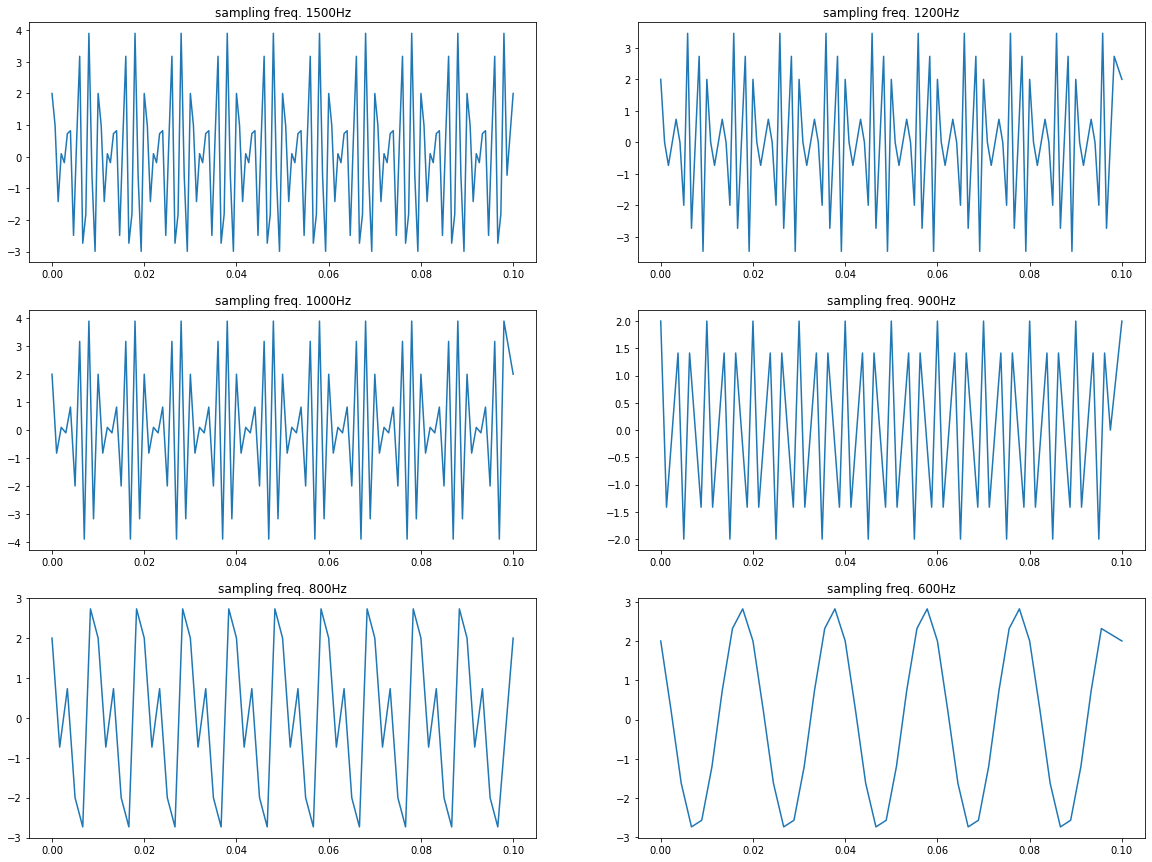

In [8]:
fig,((sub1, sub2),( sub3,sub4),(sub5,sub6)) =  plt.subplots(3,2, figsize=(20,15))
sub1.plot(T1,wave1)
sub1.set_title("sampling freq. 1500Hz")
sub2.plot(T2,wave2)
sub2.set_title("sampling freq. 1200Hz")
sub3.plot(T3,wave3)
sub3.set_title("sampling freq. 1000Hz")
sub4.plot(T4,wave4)
sub4.set_title("sampling freq. 900Hz")
sub5.plot(T5,wave5)
sub5.set_title("sampling freq. 800Hz")
sub6.plot(T6,wave6)
sub6.set_title("sampling freq. 600Hz")
plt.show()

These plots are different despite being the same frequency and same function i.e.`asin(wt)+acos(wt)`.Let's analyze why is it so? Until we lower the sampling frequency to 1000Hz You can see that the waveforms look somewhat similar, although the quality decreases. But below 150Hz waveforms are completely different. This is the result of having too few samples in a cycle of waveform.
  
This is formulated in **Nyquist Theorem** which states:  
***Band-limited functions can be reconstructed from equispaced data if there are two or more samples per cycle for the highest frequency present.***[[source]](https://wiki.seg.org/wiki/Dictionary:Sampling_theorem)

  
In our case the highest frequency is 500Hz so according to Nyquist Theorem minimum required sampling frequency to faithfully recover the highest frequency in 1000Hz, below which the signal can not be reconstructed. The phenomena of distortion of signal due to insufficient sampling is decribed as **Aliasing**.[[source]](https://wiki.seg.org/wiki/Dictionary:Alias)   
![alisaing](https://wiki.seg.org/images/c/c5/Sega8.jpg)
Aliasing of 200 Hz (dashed line) as 50 Hz (solid line).

Let's verify our result by using **Fourier Transform** of all the waveforms of our signal. But first let's look at a simple example of Fourier Transform using `scipy` package. 

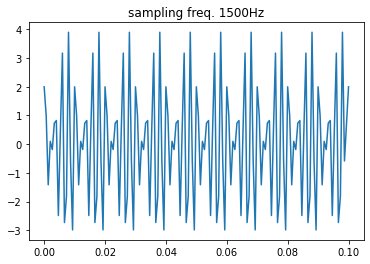

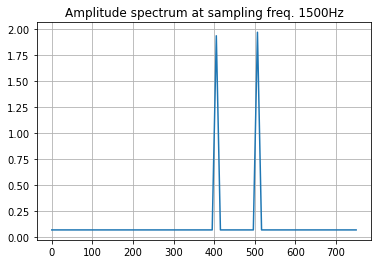

In [9]:
#Plotting the waveform at sampling freq. 1500, since T1 and wave1 are preserved
plt.plot(T1,wave1)
plt.title("sampling freq. 1500Hz")
plt.show()

#redefining sampling_freq since we changed it in last couple of cells 
sampling_freq = 1500

#no. of samples
N = int(sampling_freq*time)

#sampling interval
interval = 1/sampling_freq

#fft of wave1
yf = fft(wave1)

#linspace for FFT
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

#plotting FFT
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Amplitude spectrum at sampling freq. 1500Hz")
plt.grid()
plt.show()

Now let's plot the waveforms and their respective Fourier Transforms using the same methodology as above for all the different sampling frequencies.

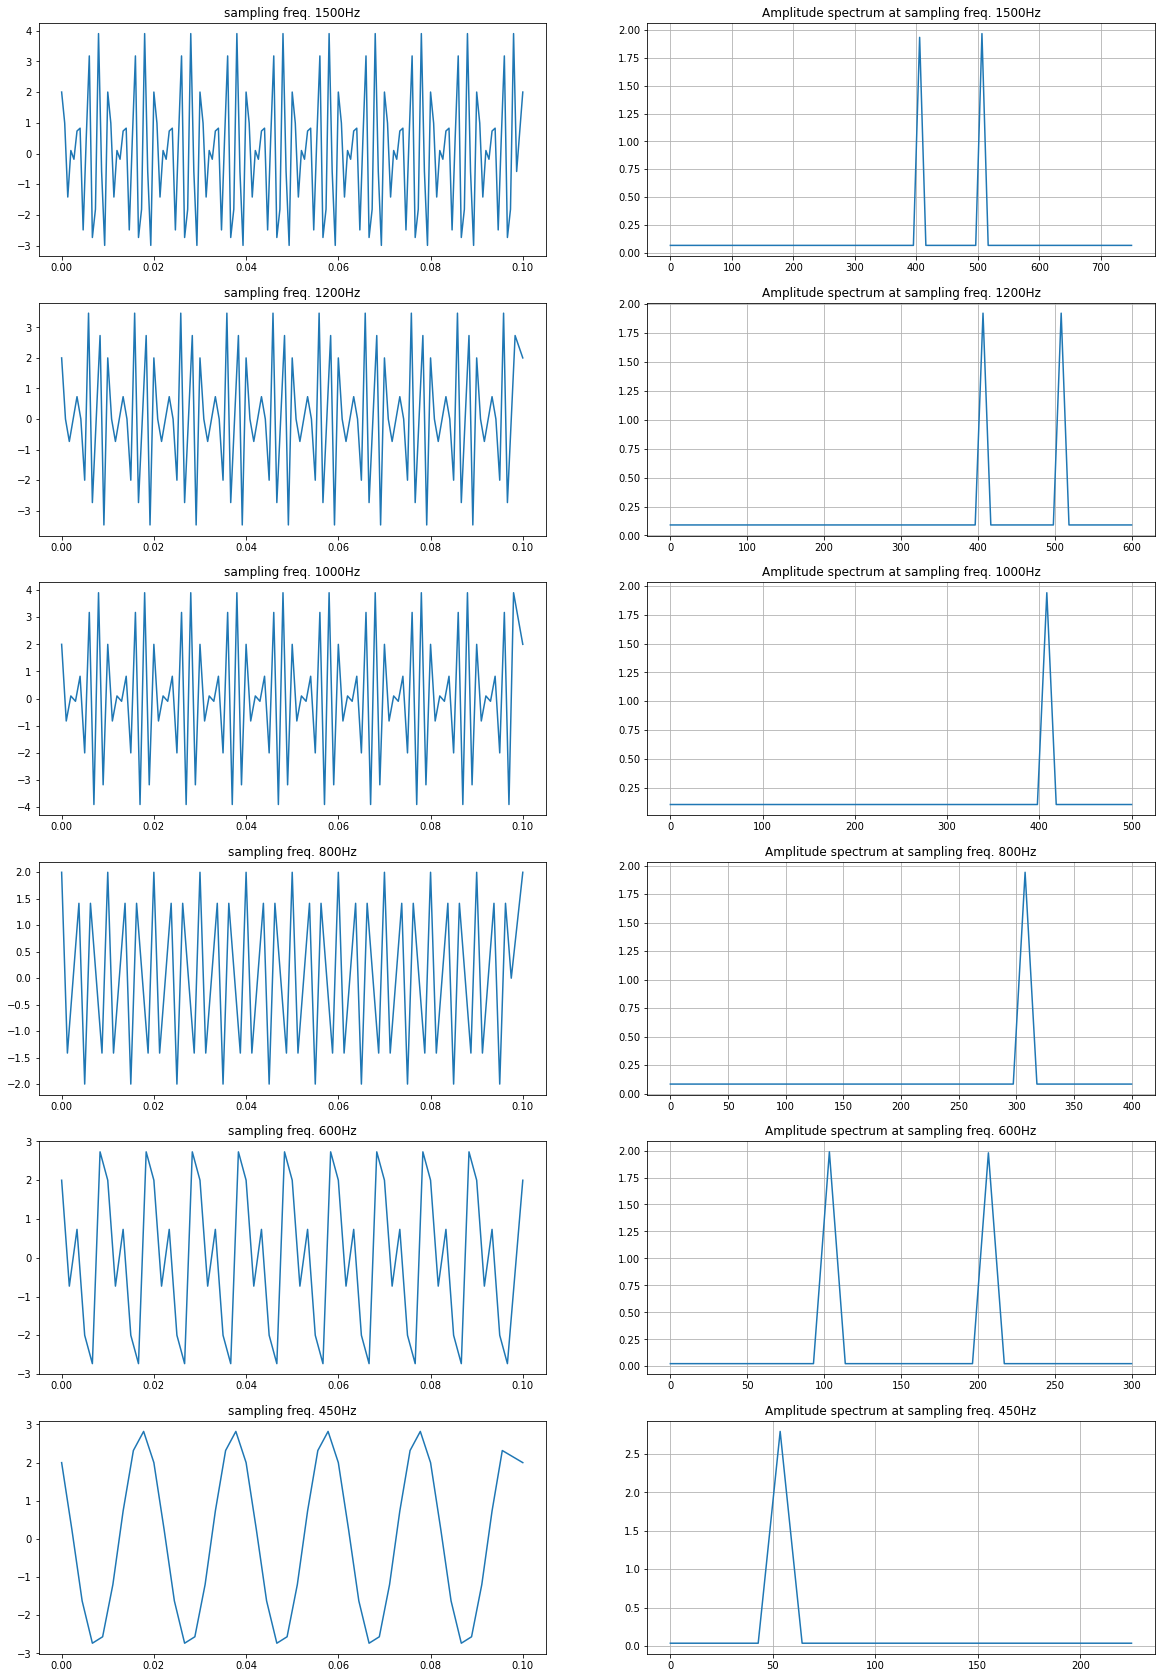

In [10]:
fig,((sub1, sub2),( sub3,sub4),(sub5,sub6),(sub7,sub8),(sub9,sub10),(sub11,sub12)) =  plt.subplots(6,2, figsize=(20,30))

sampling_freq = 1500
sub1.plot(T1,wave1)
sub1.set_title("sampling freq. 1500Hz")


N = int(sampling_freq*time)
interval = 1/sampling_freq

yf = fft(wave1)
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

sub2.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
sub2.grid()
sub2.set_title("Amplitude spectrum at sampling freq. 1500Hz")

sampling_freq = 1200
sub3.plot(T2,wave2)
sub3.set_title("sampling freq. 1200Hz")


N = int(sampling_freq*time)
interval = 1/sampling_freq

yf = fft(wave2)
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

sub4.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
sub4.grid()
sub4.set_title("Amplitude spectrum at sampling freq. 1200Hz")

sampling_freq = 1000
sub5.plot(T3,wave3)
sub5.set_title("sampling freq. 1000Hz")


N = int(sampling_freq*time)
interval = 1/sampling_freq

yf = fft(wave3)
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

sub6.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
sub6.grid()
sub6.set_title("Amplitude spectrum at sampling freq. 1000Hz")


sampling_freq = 800
sub7.plot(T4,wave4)
sub7.set_title("sampling freq. 800Hz")


N = int(sampling_freq*time)
interval = 1/sampling_freq

yf = fft(wave4)
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

sub8.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
sub8.grid()
sub8.set_title("Amplitude spectrum at sampling freq. 800Hz")


sampling_freq = 600
sub9.plot(T5,wave5)
sub9.set_title("sampling freq. 600Hz")


N = int(sampling_freq*time)
interval = 1/sampling_freq

yf = fft(wave5)
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

sub10.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
sub10.grid()
sub10.set_title("Amplitude spectrum at sampling freq. 600Hz")

sampling_freq = 450
sub11.plot(T6,wave6)
sub11.set_title("sampling freq. 450Hz")


N = int(sampling_freq*time)
interval = 1/sampling_freq

yf = fft(wave6)
xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)

sub12.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
sub12.grid()
sub12.set_title("Amplitude spectrum at sampling freq. 450Hz")
plt.show()

The signal resembles true waveform untill the sampling freq is 1000 and both 400Hz and 500Hz peaks are visible in Amplitude Spectrum.   
`Aliasing Frequency`F<sub>a</sub>= |2\*m*F<sub>n</sub>  - F<sub>s</sub> |
* F<sub>s</sub>  is the signal frequency
* m is an integer such that F<sub>a</sub> < F<sub>n</sub>
* F<sub>n</sub> is the maximum frequency that can be sampled by given Sampling Frequency i.e. (1/2)Sampling Frequency  

At 1500Hz F<sub>n</sub> is 1500Hz, we see one peak at 400Hz and another at 500Hz. No aliasing.   
At 1200Hz F<sub>n</sub> is 1200Hz, we see one peak at 400Hz and another at 500Hz. No aliasing.   
At 1000Hz F<sub>n</sub> is 1000Hz, we only see one peak at 400Hz because 500Hz component gets aliased to 0Hz.   
At 800Hz F<sub>n</sub> is 800Hz, we only see one peak at 500Hz because 400Hz component gets aliased to 0Hz.  
At 600Hz F<sub>n</sub> is 600Hz, 500Hz component gets aliased to peak at 100Hz, and 400Hz component gets aliased to another peak at 200Hz.   
At 450Hz F<sub>n</sub> is 450Hz, both 400Hz and 500Hz components get aliased to peak at 50Hz.  

Let's write a function to diplay the waveform of a frequency and it's Amplitude spectrum using what we have learnt so far.

In [11]:
def nyquist_demo(freq1,freq2,sfreq,t,amp):
    a = amp
    f1 = freq1 
    f2 = freq2
    w1 = 2*pi*f1
    w2 = 2*pi*f2
    time = t                                         
    sampling_freq = sfreq  
    T = np.linspace(0, time*sampling_freq, int(time*sampling_freq),dtype=int)/sampling_freq
    wave = a*np.sin(w1*T)+a*np.cos(w2*T)
    fig,(sub1, sub2) =  plt.subplots(1,2, figsize=(20,5))
    sub1.plot(T,wave)
    sub1.set_title("{}*sin({}*t)+{}*cos({}*t) at sampling freq. {}Hz".format(amp,f1,amp,f2,sampling_freq))

    N = int(sampling_freq*time)
    interval = 1/sampling_freq
    
    yf = fft(wave)
    xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)
    
    sub2.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    sub2.set_title("Amplitude spectrum at sampling freq. {}Hz".format(sampling_freq))
    sub2.grid()
    plt.show()

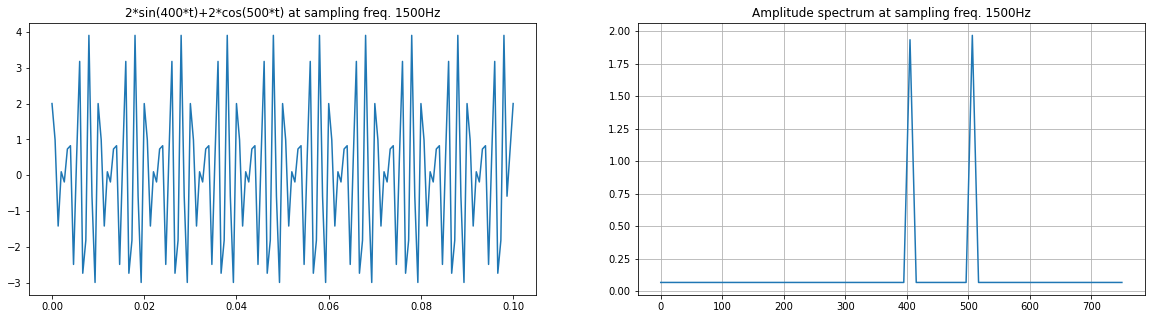

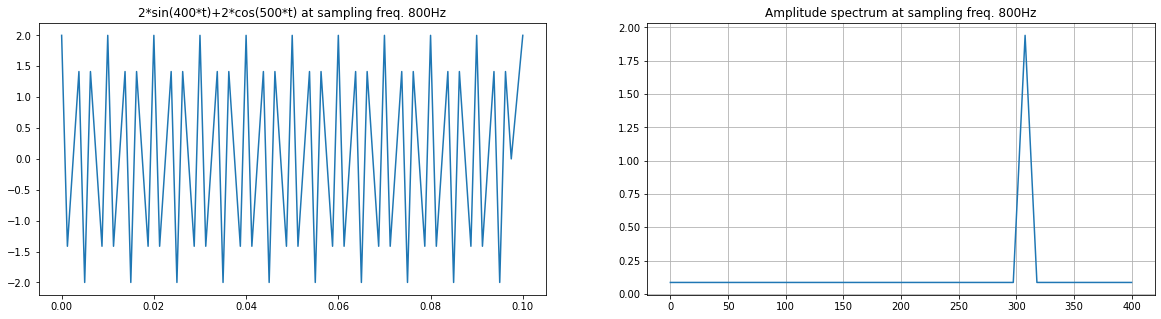

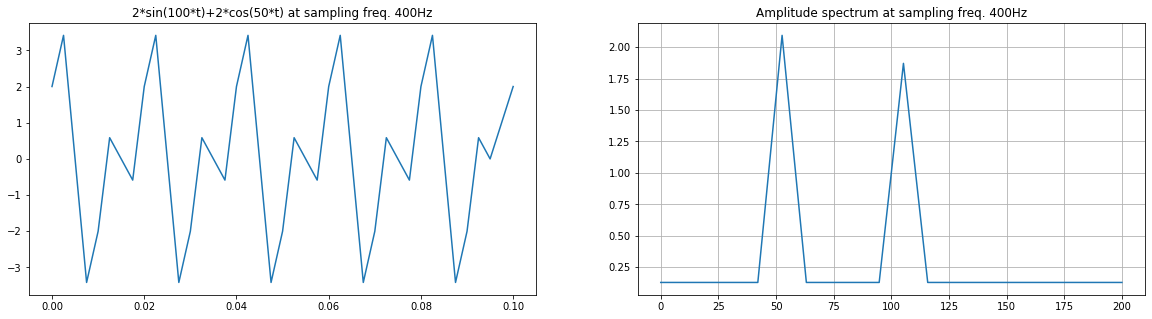

In [12]:
#recreates asin(w1*t)+acos(w2*t) at 1500 Hz 
nyquist_demo(400,500,1500,0.1,2)

#recreates asin(w1*t)+acos(w2*t) at 800 Hz 
nyquist_demo(400,500,800,0.1,2)

#recreates asin(w1*t)+acos(w2*t) at 800 Hz 
nyquist_demo(100,50,400,0.1,2)

To plot a sin wave of particular frequency at a given sampling rate keep f2 = 0 like the following example.

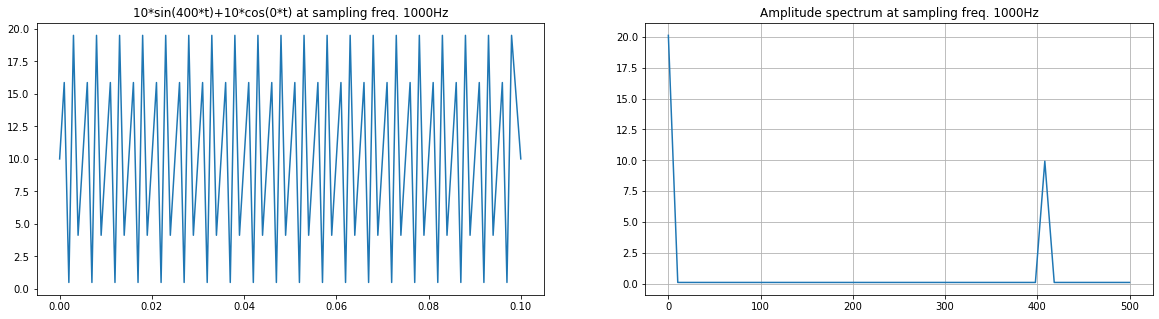

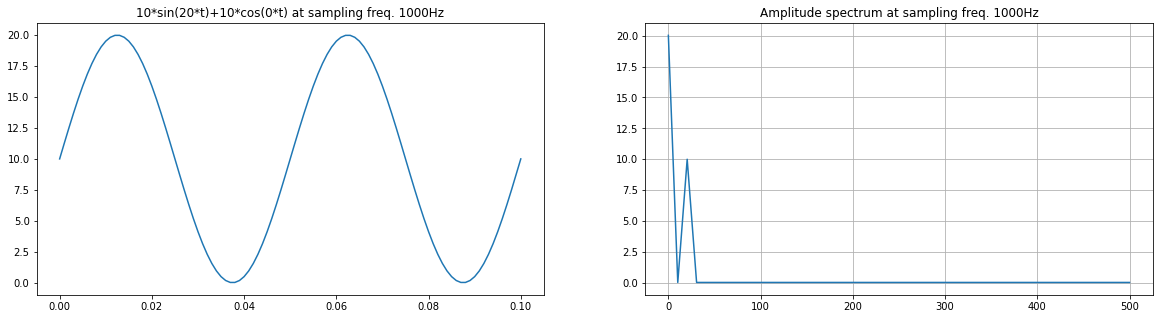

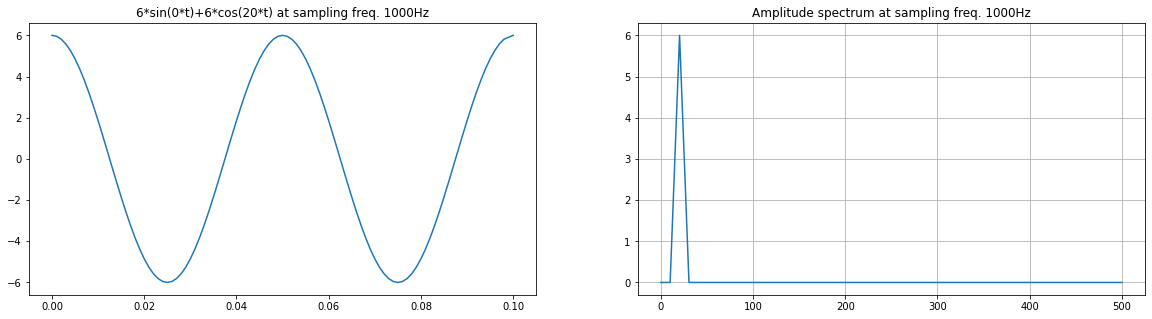

In [28]:
nyquist_demo(400,0,1000,0.1,10)
nyquist_demo(20,0,1000,0.1,10)
nyquist_demo(0,20,1000,0.1,6)

you can see the 0Hz component peak in amplitude spectrum even though the curve looks like a sin curve. Guess Why??  Hint: Look at the amplitude and plot title in the `nyquist_demo(20,0,1000,0.1,10)` plot.  
Let's see what happens if we remove `acos(w*t)` component from the function.

In [31]:
def nyquist_sin(freq1,sfreq,t,amp):
    a = amp
    f1 = freq1 
    w1 = 2*pi*f1
    time = t                                         
    sampling_freq = sfreq  
    T = np.linspace(0, time*sampling_freq, int(time*sampling_freq),dtype=int)/sampling_freq
    wave = a*np.sin(w1*T)
    fig,(sub1, sub2) =  plt.subplots(1,2, figsize=(20,5))
    sub1.plot(T,wave)
    sub1.set_title("{}*sin({}*t) at sampling freq. {}Hz".format(amp,f1,sampling_freq))

    N = int(sampling_freq*time)
    interval = 1/sampling_freq
    
    yf = fft(wave)
    xf = np.linspace(0.0, 1.0/(2.0*interval), N//2)
    
    sub2.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    sub2.set_title("Amplitude spectrum at sampling freq. {}Hz".format(sampling_freq))
    sub2.grid()
    plt.show()

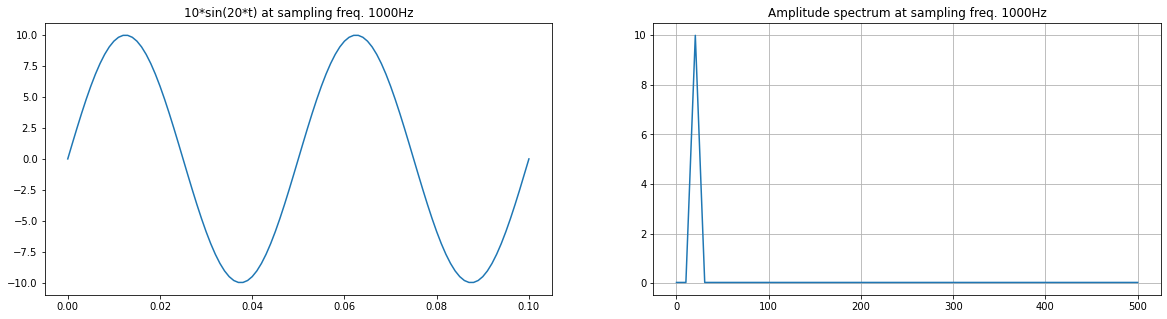

In [32]:
nyquist_sin(20,1000,0.1,10)

You don't see the 0Hz component peak in amplitude spectrum and the curve still looks like a sin curve. The reason we see a 0Hz component in the previous plot is that `10*cos(0*t)` evaluates to a constatnt component of `amplitude 10` since `cos(0)=1` which gets added to the sin curve and hence the increase in amplitude is also seen.

Write a function similar to `nyquist_demo` and Play with the function to see the results for yourselves.

# Here are some helpful links for your reference
1. [FFT using scipy.fft](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html#d-discrete-fourier-transforms)
1. [Frequency Aliasing](https://wiki.seg.org/wiki/Frequency_aliasing)